# Classification Errors

Now that we've started discussing classification, it's time to examine comparing our models to each other and choosing models of best fit. Previously in regression, we've been predicting values so it made sense to discuss error as a distance of how far off our estimates were. In classifying a binary variable however, we are either correct or incorrect. As a result, we tend to deconstruct this as how many false positives versus false negatives we come across.  
In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm.  
  
$Precision = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$    
  

$Recall = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$  
  
$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$

![](./images/Precisionrecall.png)

At times, we may wish to tune a classification algorithm to optimize against precison or recall rather then overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is much preferable to optimize for precision, the number of cancer positive cases, then it is to optimize recall, the percentage of our predicted cancer-risk patients who are indeed positive.

## 1. Split the data into train and test sets

In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [77]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:-1]]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

## 2. Create a standard logistic regression model

In [78]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)

## 3. Write a function to calculate the precision

In [79]:
from sklearn.metrics import confusion_matrix

def precision(y_hat, y):
    cm = confusion_matrix(y,y_hat)
    return round(cm[0,0]/(cm[0,0]+cm[1,0]),4)

## 4. Write a function to calculate the recall

In [80]:
def recall(y_hat, y):
    cm = confusion_matrix(y,y_hat)
    return round(cm[0,0]/(cm[0,0]+cm[0,1]),4)

## 5. Write a function to calculate the accuracy

In [92]:
def accuracy(y_hat, y):
    cm = confusion_matrix(y,y_hat)
    return round((cm[0,0]+cm[1,1])/len(y),4)

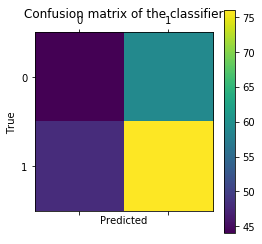

In [108]:
cm = confusion_matrix(y_train,y_hat)

cax = plt.matshow(cm)
plt.title('Confusion matrix of the classifier')
plt.colorbar(cax)

plt.xlabel('Predicted')
plt.ylabel('True');


## 6. Calculate the precision, recall and accuracy of your classifier

Do this for both the train and the test set.

In [76]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

print('Training Precision: ', precision(y_hat_train, y_train))
print('Training Recall: ', recall(y_hat_train, y_train))
print('Training Accuracy: ', accuracy(y_hat_train, y_train))
print('\n')

print('Testing Precision: ', precision(y_hat_test, y_test))
print('Testing Recall: ', recall(y_hat_test, y_test))
print('Testing Accuracy: ', accuracy(y_hat_test, y_test))

Training Precision:  0.8925
Training Recall:  0.7905
Training Accuracy:  0.859


Testing Precision:  0.8571
Testing Recall:  0.7273
Testing Accuracy:  0.8289


## 7. Comparing Precision Recall and Accuracy of Test vs Train Sets


Plot the precision, recall and accuracy for test and train splits using different train set sizes. What do you notice?

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
training_Precision = []
testing_Precision = []
training_Recall = []
testing_Recall = []
training_Accuracy = []
testing_Accuracy = []

for i in range(10,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i/100) #replace the "None" here
    logreg = LogisticRegression(fit_intercept = False, C = 1e12)
    model_log = logreg.fit(X_train,y_train)
    y_hat_test = model_log.predict(X_test)
    y_hat_train = model_log.predict(X_train)

# 6 lines of code here
    training_Precision.append(precision(y_hat_train,y_train))
    testing_Precision.append(precision(y_hat_test,y_test))
    
    training_Recall.append(recall(y_hat_train,y_train))
    testing_Recall.append(recall(y_hat_test,y_test))
    
    training_Accuracy.append(accuracy(y_hat_train,y_train))
    testing_Accuracy.append(accuracy(y_hat_test,y_test))

Create 3 scatter plots looking at the test and train precision in the first one, test and train recall in the second one, and testing and training accuracy in the third one.

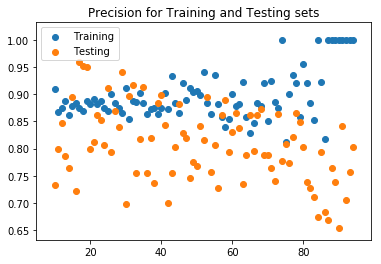

In [114]:
# code for test and train precision
plt.scatter(range(10,95),training_Precision, label='Training')
plt.scatter(range(10,95),testing_Precision,label='Testing')
plt.title('Precision for Training and Testing sets')
plt.legend(loc='best');

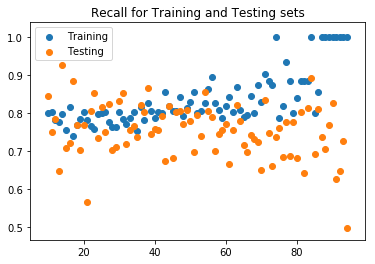

In [115]:
# code for test and train recall
plt.scatter(range(10,95),training_Recall, label='Training')
plt.scatter(range(10,95),testing_Recall,label='Testing')
plt.title('Recall for Training and Testing sets')
plt.legend(loc='best');

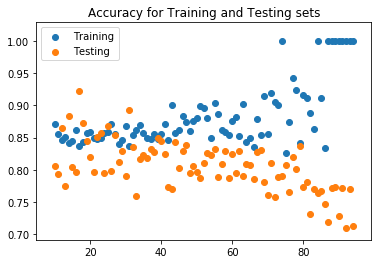

In [116]:
# code for test and train accuracy
plt.scatter(range(10,95),training_Accuracy, label='Training')
plt.scatter(range(10,95),testing_Accuracy,label='Testing')
plt.title('Accuracy for Training and Testing sets')
plt.legend(loc='best');